<a href="https://www.kaggle.com/code/handandegerli/item-based-collaborative-filtering?scriptVersionId=182370690" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
###########################################
# Item-Based Collaborative Filtering
###########################################

# Veri seti: https://grouplens.org/datasets/movielens/

# Adım 1: Veri Setinin Hazırlanması
# Adım 2: User Movie Df'inin Oluşturulması
# Adım 3: Item-Based Film Önerilerinin Yapılması
# Adım 4: Çalışma Scriptinin Hazırlanması

######################################
# Adım 1: Veri Setinin Hazırlanması
######################################
import pandas as pd
pd.set_option('display.max_columns', 500)
movie = pd.read_csv('/kaggle/input/dataset-for-ibcf/movie.csv')
rating = pd.read_csv('/kaggle/input/dataset-for-ibcf/rating.csv')
df = movie.merge(rating, how="left", on="movieId")#movie sol rating sagda olcak sekilde birleştirdik
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.5,2009-01-02 01:13:41


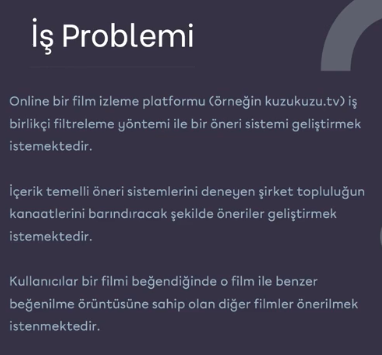

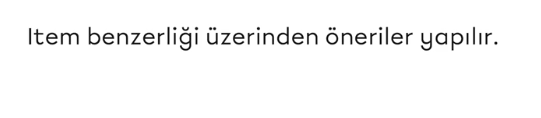

In [2]:
######################################
# Adım 2: User Movie Df'inin Oluşturulması
######################################

df.head()
df.shape

df["title"].nunique()

df["title"].value_counts().head()

title
Pulp Fiction (1994)                 67310
Forrest Gump (1994)                 66172
Shawshank Redemption, The (1994)    63366
Silence of the Lambs, The (1991)    63299
Jurassic Park (1993)                59715
Name: count, dtype: int64

In [3]:
comment_counts = pd.DataFrame(df["title"].value_counts())
comment_counts = comment_counts.reset_index()
comment_counts.columns
comment_counts.head()
comment_counts["title"] 
rare_movies = comment_counts[comment_counts["count"] <= 1000]["title"] 

In [4]:
common_movies = df[~df["title"].isin(rare_movies)]

In [5]:
common_movies.shape

(17766015, 6)

In [6]:
common_movies["title"].nunique()

3159

In [7]:
df["title"].nunique()

27262

In [8]:
user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")

In [9]:
user_movie_df.shape
user_movie_df.columns

Index([''burbs, The (1989)', '(500) Days of Summer (2009)',
       '*batteries not included (1987)', '...And Justice for All (1979)',
       '10 Things I Hate About You (1999)', '10,000 BC (2008)',
       '101 Dalmatians (1996)',
       '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
       '102 Dalmatians (2000)', '12 Angry Men (1957)',
       ...
       'Zero Dark Thirty (2012)', 'Zero Effect (1998)', 'Zodiac (2007)',
       'Zombieland (2009)', 'Zoolander (2001)', 'Zulu (1964)', '[REC] (2007)',
       'eXistenZ (1999)', 'xXx (2002)', '¡Three Amigos! (1986)'],
      dtype='object', name='title', length=3159)

In [10]:
######################################
# Adım 3: Item-Based Film Önerilerinin Yapılması
######################################

movie_name = "Matrix, The (1999)"
movie_name = "Ocean's Twelve (2004)"
movie_name = user_movie_df[movie_name]
user_movie_df.corrwith(movie_name).sort_values(ascending=False).head(10)


movie_name = pd.Series(user_movie_df.columns).sample(1).values[0] # gelen değerin sadece film bolumunu istediğim için values 0 alıyorum
movie_name = user_movie_df[movie_name]
user_movie_df.corrwith(movie_name).sort_values(ascending=False).head(10)

#mesela yılını hatırlayamıyorsak:
def check_film(keyword, user_movie_df):
    return [col for col in user_movie_df.columns if keyword in col]

check_film("Insomnia", user_movie_df)

['Insomnia (1997)', 'Insomnia (2002)']

In [11]:
######################################
# Adım 4: Çalışma Scriptinin Hazırlanması
######################################

def create_user_movie_df():
    import pandas as pd
    movie = pd.read_csv('/kaggle/input/dataset-for-ibcf/movie.csv')
    rating = pd.read_csv('/kaggle/input/dataset-for-ibcf/rating.csv')
    df = movie.merge(rating, how="left", on="movieId")
    comment_counts = pd.DataFrame(df["title"].value_counts())
    #rare_movies = comment_counts[comment_counts["title"] <= 1000].index #index diyince film ismi vermesi gerekiyordu vermedi
    comment_counts = comment_counts.reset_index()
    rare_movies = comment_counts[comment_counts["count"] <= 1000]["title"]
    common_movies = df[~df["title"].isin(rare_movies)]
    user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")
    return user_movie_df

user_movie_df = create_user_movie_df()


def item_based_recommender(movie_name, user_movie_df):
    movie_name = user_movie_df[movie_name]
    return user_movie_df.corrwith(movie_name).sort_values(ascending=False).head(10)

item_based_recommender("Matrix, The (1999)", user_movie_df)

movie_name = pd.Series(user_movie_df.columns).sample(1).values[0]

item_based_recommender(movie_name, user_movie_df)

title
Rocky IV (1985)                      1.000000
Rocky III (1982)                     0.738783
Rocky II (1979)                      0.655671
Rambo III (1988)                     0.634270
Rambo: First Blood Part II (1985)    0.612778
Rocky V (1990)                       0.593566
Tango & Cash (1989)                  0.530570
Karate Kid, Part II, The (1986)      0.502279
Beverly Hills Cop II (1987)          0.489740
Superman III (1983)                  0.476221
dtype: float64

**Pratikte bu işleri veri tabanıyla konusarak yaparız. pareto kuralına gore vs belirlenir hangi filmi onermek istiyorsak bu sekılde pythonda hesaplanıp hangi filme hangi filmler tavsiye edilsin diye bunlar tabloya basılır. Bunlar hızlı bir şekilde sorguya yanıt donsun diye indexlenir.kullanıcıya izlediği film sonrası oneride bulunulmak istendiğinde sonuclar getirirlir